In [2]:
import numpy as np
import pandas as pd
df= pd.read_csv("C:/Users/dnyan/ML Assignments/Dataset/Mall_Customers.csv")

In [3]:
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Strip any accidental whitespace in column names
df.columns = df.columns.str.strip()

# Display column names to verify
print("Columns:", df.columns.tolist())

# Drop CustomerID column
if 'CustomerID' in df.columns:
    df.drop('CustomerID', axis=1, inplace=True)

# Encode 'Genre' column (Male/Female) using Label Encoding
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])  # Male = 1, Female = 0 (usually)

# Feature scaling using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert scaled data back to DataFrame for ease
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Show the first few rows of the preprocessed data
print("\nPreprocessed Data Sample:")
print(df_scaled.head())

Columns: ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Preprocessed Data Sample:
      Genre       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980


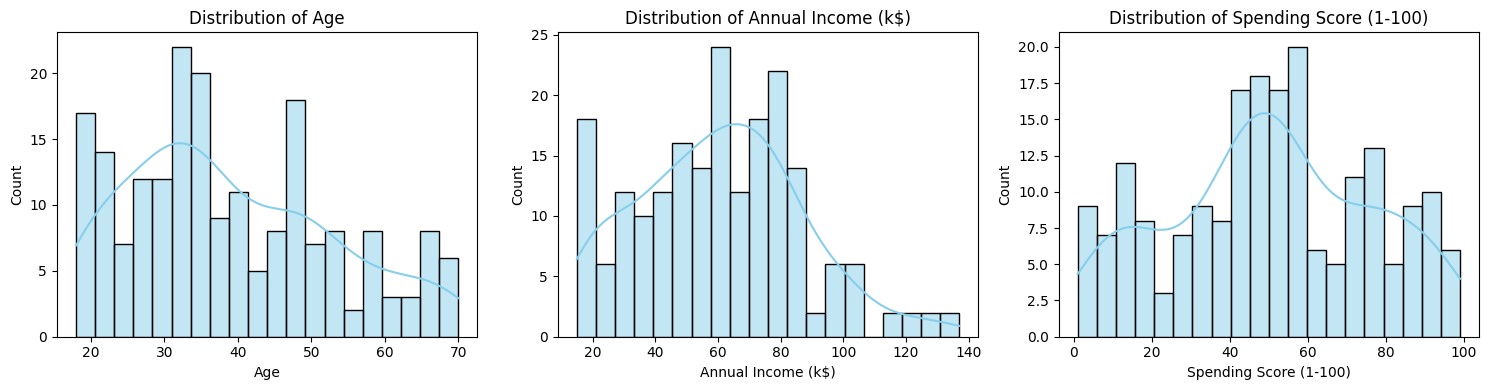

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

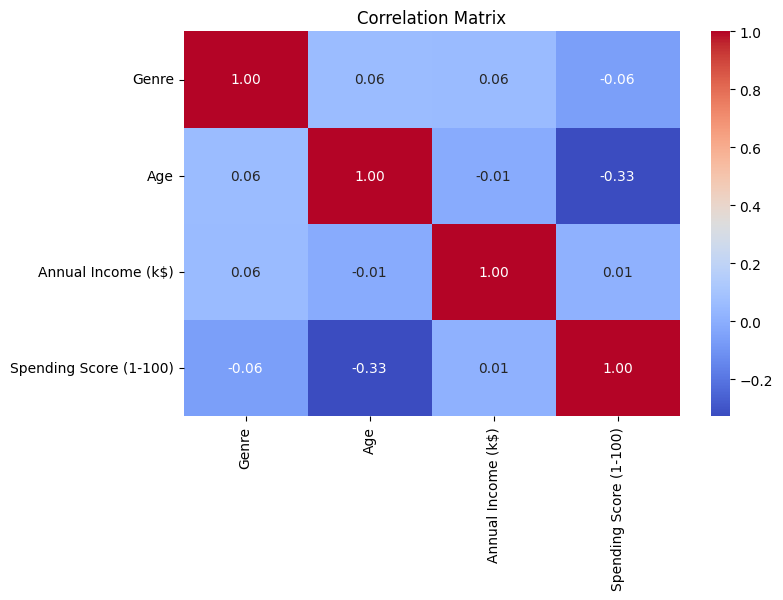

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

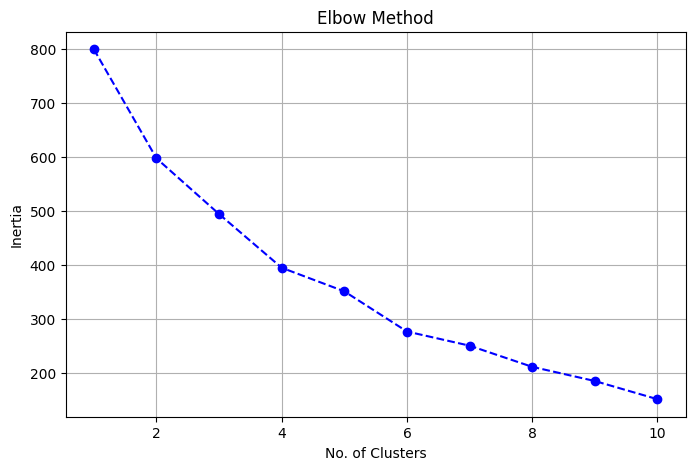

In [10]:
from sklearn.cluster import KMeans

inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo--')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

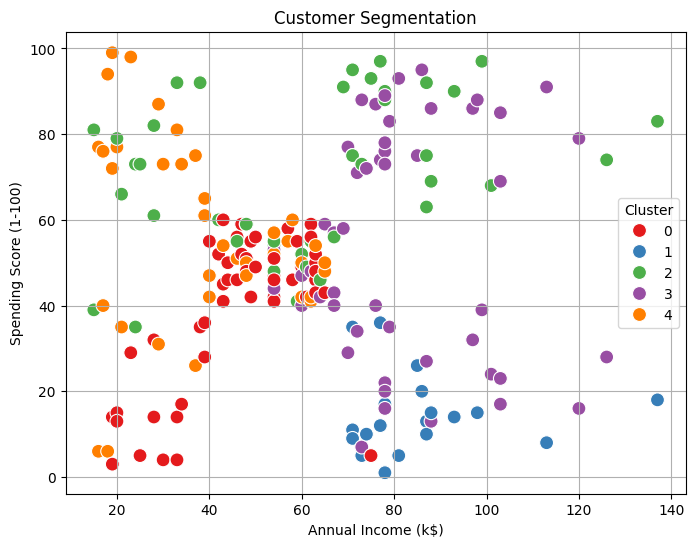

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set1', s=100)
plt.title("Customer Segmentation")
plt.grid()
plt.show()

C:\Users\dnyan\AppData\Local\Temp\ipykernel_10332\3177132749.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set2')


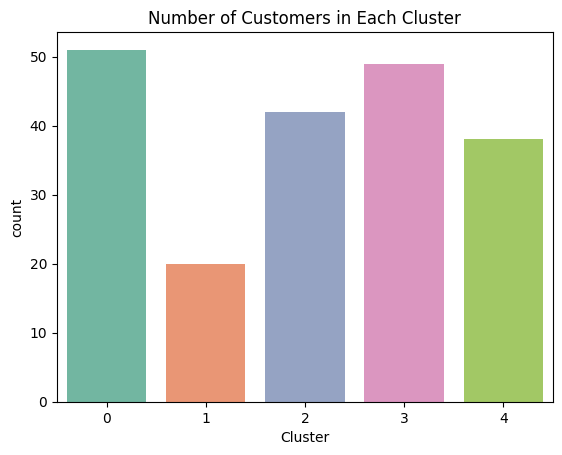

In [13]:
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title("Number of Customers in Each Cluster")
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.272
